In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_json('/Users/thienhtt20/PycharmProjects/anime-scrapy/anime-list1.json')

In [3]:
# Cleaning data in "ranked" column
df.ranked = df.ranked.astype(str)
df.ranked = df.ranked.str.replace("#", "")
df.ranked = df.ranked.astype('int64')
df.sort_values(by=['ranked'])

,name,type,volumes,chapters,status,time_published,genres,theme,demographic,serialization,score,ranked,popularity,members,favorites
2,Berserk,[Manga],Unknown\n,Unknown\n,Publishing,"Aug 25, 1989 to ?","[Action, Adventure, Award Winning, Drama, Fant...","[Gore, Military, Mythology, Psychological]",[Seinen],[Young Animal],[9.47],1,#2,"626,457","116,653"
13,Monster,[Manga],18\n,162\n,Finished,"Dec 5, 1994 to Dec 20, 2001","[Award Winning, Drama, Mystery]","[Adult Cast, Psychological]",[Seinen],[Big Comic Original],[9.15],5,#29,"221,866","19,353"
9,Slam Dunk,[Manga],31\n,276\n,Finished,"Sep 18, 1990 to Jun 4, 1996","[Award Winning, Sports]","[School, Team Sports]",[Shounen],[Shounen Jump (Weekly)],[9.07],6,#58,"153,072","14,482"
15,Fullmetal Alchemist,[Manga],27\n,116\n,Finished,"Jul 12, 2001 to Sep 11, 2010","[Action, Adventure, Award Winning, Drama, Fant...",[],[Shounen],[Shounen Gangan],[9.04],7,#18,"280,558","29,448"
10,Vinland Saga,[Manga],Unknown\n,Unknown\n,Publishing,"Apr 13, 2005 to ?","[Action, Adventure, Award Winning, Drama]",[],[Seinen],[Afternoon],[9.03],8,#20,"271,402","29,546"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3977,Homemade Home,[Manga],1\n,5\n,Finished,Not available,"[Drama, Romance]",[],[Shoujo],[Betsucomi],[6.37],15774,#28233,252,0
3974,Kiss to Karada,[Manga],1\n,2\n,Finished,Not available,[],[],[Josei],[Petit Comic],[6.37],15775,#19193,562,0
3971,Mondlicht: Tsuki no Tsubasa,[Manga],5\n,34\n,Finished,"Apr 26, 2007 to Mar 26, 2010","[Action, Drama, Supernatural, Ecchi]",[],[Shounen],[Comic Rush],[6.37],15776,#8003,"2,044",7
3969,Angel Profile,[Manga],1\n,4\n,Finished,"Oct 12, 2007 to Apr 12, 2008","[Fantasy, Slice of Life]",[],[Shoujo],[Comic B's-LOG],[6.37],15777,#25915,308,0


In [4]:
# Drop columns that may not relevant to the purpose of determining score
df.drop(['theme'],axis = 1, inplace=True)
df.drop(['demographic'],axis = 1, inplace=True)
df.drop(['chapters'],axis = 1, inplace = True)
df.drop(['volumes'],axis = 1, inplace = True)

In [5]:
df_test = df.copy()

In [7]:
# process data in "string" type

# df_test.volumes = df_test.volumes.str.replace("Unknown", "")
# df_test.chapters = df_test.chapters.str.replace("Unknown", "")
# df_test.volumes = df_test.volumes.replace(" ", np.NaN)
# df_test.chapters = df_test.chapters.replace(" ", np.NaN)

In [8]:
# Convert datatype to float

# df_test.volumes = df_test.volumes.astype('float')
# df_test.chapters = df_test.chapters.astype('float')

In [9]:
# Normalize dataset
# Because of "genres" column has numerous attributes
genres = pd.get_dummies(df['genres'].apply(pd.Series).stack()).sum(level=0)
df_test3 = pd.concat([df_test, genres], axis=1)


/var/folders/49/0z2npmwj0rlf4ldy37x66bb00000gn/T/ipykernel_24748/781478591.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  genres = pd.get_dummies(df['genres'].apply(pd.Series).stack()).sum(level=0)
/var/folders/49/0z2npmwj0rlf4ldy37x66bb00000gn/T/ipykernel_24748/781478591.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  genres = pd.get_dummies(df['genres'].apply(pd.Series).stack()).sum(level=0)


In [10]:
df_test3.score.astype(str)

0       ['8.92']
1       ['8.94']
2       ['9.47']
3       ['8.88']
4       ['8.92']
          ...   
3981    ['6.37']
3982    ['6.37']
3983    ['6.37']
3984    ['6.37']
3985    ['6.37']
Name: score, Length: 3986, dtype: object

In [11]:
df_test3.score = df_test3.score.apply(lambda x: x[0])
df_test3.score.astype('float')

0       8.92
1       8.94
2       9.47
3       8.88
4       8.92
        ... 
3981    6.37
3982    6.37
3983    6.37
3984    6.37
3985    6.37
Name: score, Length: 3986, dtype: float64

In [12]:
score = df_test3.score
df_test3 = df_test3.drop(['score'],axis=1)
df_test3.insert(10,'score',score)
df_test4 = df_test3.iloc[:,10:]

In [13]:
# drop na because of merging 2 dataframes
df_test4 = df_test4.dropna()

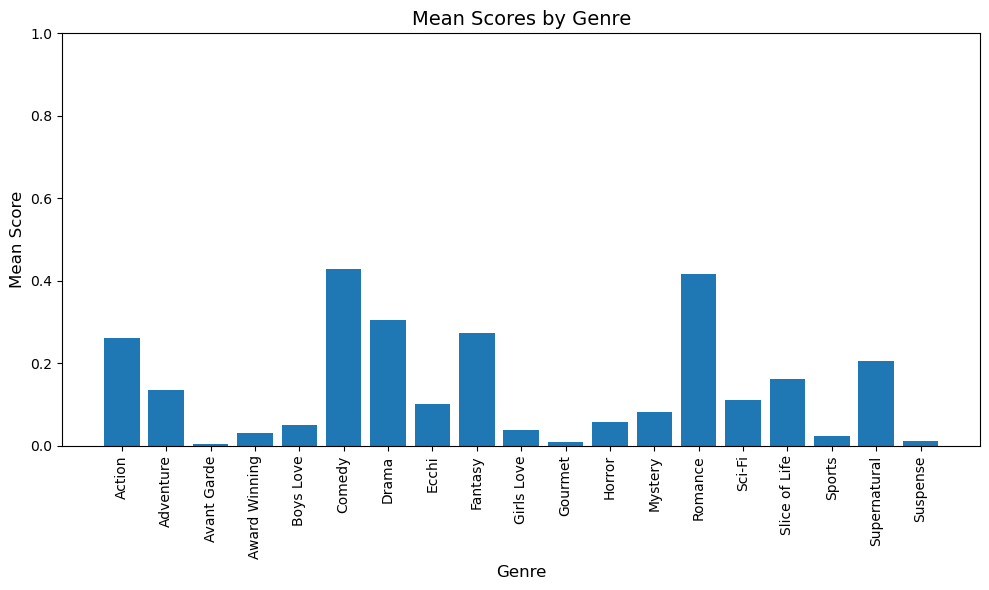

In [14]:
# NOTE: with various scores for multi-genres
# We can assign it to a separate column 
# --> Easily get the mean of each score for multi-genres
df_test5 = df_test4.sort_values(by=['score'],ascending = False)
df_test5 = df_test5.set_index('score')
df_test5 = df_test5.astype(float)

mean_scores = df_test5.mean()
genres = mean_scores.index

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting mean scores
ax.bar(genres, mean_scores)

ax.set_title('Mean Scores by Genre', fontsize=14)
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Mean Score', fontsize=12)
ax.set_ylim([0, 1])  # Set y-axis limit from 0 to 10 or adjust as needed

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [16]:
# We are going to compute the correlation between 'status' and 'rank'|| "popularity"
df_cor = df_test.copy()

In [17]:
def format_data(df_cor,x):
    for i in range(df_cor.shape[0]):
        df_cor.iat[i,x] = df_cor.iat[i,x].strip()

In [18]:
# Transforming the "status" column
format_data(df_cor,2)
d = {'Finished': 1, 'Publishing': 0}
df_cor.status = df_cor['status'].map(d)


In [19]:
df_cor.status

0       0.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
3981    1.0
3982    1.0
3983    1.0
3984    1.0
3985    1.0
Name: status, Length: 3986, dtype: float64

In [20]:
# Drop unessary column

# df_cor.drop(['volumes'],axis=1,inplace=True)
# df_cor.drop(['chapters'],axis=1,inplace=True)


In [21]:
# Convert to float

df_cor.status = pd.to_numeric(df_cor.status)

In [22]:
# "members" column
format_data(df_cor,9)
df_cor.members = df_cor.members.apply(lambda x: x.replace(',',''))
df_cor.members = df_cor.members.astype(float)

In [23]:
# "favorites" column
format_data(df_cor,10)
df_cor.favorites = df_cor.favorites.apply(lambda x: x.replace(',',''))
df_cor.favorites = df_cor.favorites.astype(float)

In [24]:
# "score" column
df_cor.score = df_cor.score.apply(lambda x: x[0])
df_cor.score = df_cor.score.astype('float')

In [25]:
# "popularity" column
format_data(df_cor,8)
df_cor.popularity = df_cor.popularity.apply(lambda x: x.replace('#',''))
df_cor.popularity = df_cor.popularity.astype(float)

In [26]:
# Compute correlation
cor_sta_rank = df_cor.status.corr(df_cor.ranked)
cor_sta_members = df_cor.status.corr(df_cor.members)
cor_sta_fav = df_cor.status.corr(df_cor.favorites)
cor_sta_pop = df_cor.status.corr(df_cor.popularity)
cor_sta_score = df_cor.status.corr(df_cor.score)

In [27]:
# Dropping column for plotting heat map
df_cor.drop(['name'],axis = 1, inplace = True)
df_cor.drop(['type'],axis = 1, inplace = True)
df_cor.drop(['time_published'],axis = 1, inplace = True)
df_cor.drop(['genres'],axis = 1, inplace = True)
df_cor.drop(['serialization'],axis = 1, inplace = True)

In [28]:
main_cor = df_cor.corr()

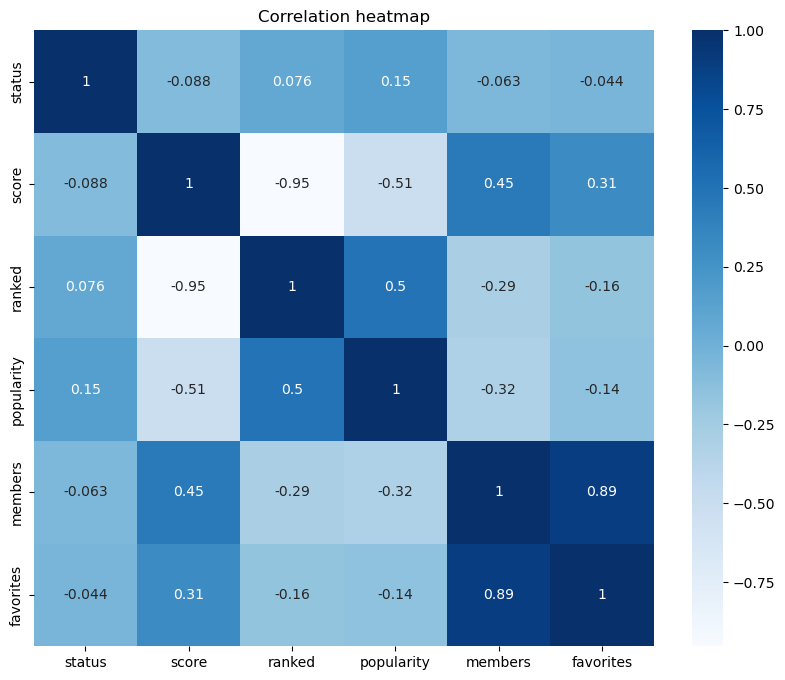

In [132]:
# HEATMAP 1

plt.figure(figsize=(10,8))
sns.heatmap(main_cor,annot=True, cmap='Blues')

plt.title('Correlation heatmap')
plt.show()

In [222]:
# HEATMAP 2 --> compare to HEATMAP 1
df_cor2 = df_cor.copy()

In [223]:
# Import start and end year, and clear those years
df_cor2.insert(2,"start_year", start_year)
df_cor2.insert(3,"end_year", end_year)

df_cor2.end_year = df_cor2.end_year.replace('?', np.NaN)
df_cor2 = df_cor2.drop(df_cor2[df_cor2.start_year == 'able'].index)

In [224]:
# Convert datatype
df_cor2.start_year = df_cor2.start_year.astype(float)
df_cor2.end_year = df_cor2.end_year.astype(float)

In [225]:
cor = df_cor2.corr()

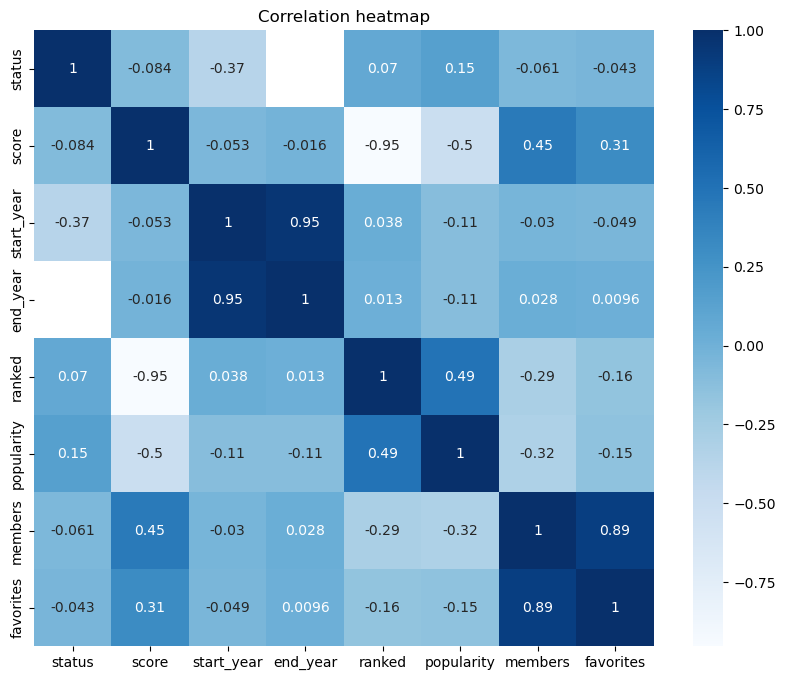

In [226]:
# Plotting HEATMAP 2 within YEAR

plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True, cmap='Blues')

plt.title('Correlation heatmap')
plt.show()

In [30]:
# plotting distribution of genres by year
# --> convert to dictionary

In [31]:
df_explore = df.copy()

In [32]:
df_explore.drop(['name'],axis = 1, inplace= True)
df_explore.drop(['serialization'],axis = 1, inplace= True)
df_explore.drop(['type'],axis = 1, inplace= True)

In [33]:
start_year = df['time_published'].str.split(' to ').str[0].str[-4:]
end_year = df['time_published'].str.split(' to ').str[1].str[-4:]

df_explore.insert(2,"start_year", start_year)
df_explore.insert(3,"end_year", end_year)

df_explore.end_year = df_explore.end_year.replace('?', np.NaN)

In [34]:
# Remove rows with vague | ambiguous data in start_year column
df_explore = df_explore.drop(df_explore[df_explore.start_year == 'able'].index)

In [35]:
df_explore.end_year.astype(float)
df_explore.start_year.astype(float)

0       1999.0
1       1968.0
2       1989.0
3       2003.0
4       2015.0
         ...  
3981    2013.0
3982    2011.0
3983    2011.0
3984    1996.0
3985    2009.0
Name: start_year, Length: 3902, dtype: float64

In [36]:
format_data(df_explore,0)

In [38]:
# Normalize dataset
# Because of "genres" column has numerous attributes
genres = pd.get_dummies(df['genres'].apply(pd.Series).stack()).sum(level=0)
df_explore2 = pd.concat([df_explore, genres], axis=1)

/var/folders/49/0z2npmwj0rlf4ldy37x66bb00000gn/T/ipykernel_24748/293272505.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  genres = pd.get_dummies(df['genres'].apply(pd.Series).stack()).sum(level=0)
/var/folders/49/0z2npmwj0rlf4ldy37x66bb00000gn/T/ipykernel_24748/293272505.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  genres = pd.get_dummies(df['genres'].apply(pd.Series).stack()).sum(level=0)


In [39]:
df_explore2 = df_explore2.dropna()

In [41]:
# year action his
# 1968      1   2
# 1969      2   3
# 1970      1   0

In [59]:
# Should run in separate box
df_ex_start_year = df_explore2.groupby('start_year', group_keys = True).apply(lambda x: x.iloc[:,10:])
df_ex_end_year = df_explore2.groupby('end_year', group_keys = True).apply(lambda x: x.iloc[:,10:])

In [102]:
# Assign to original dataframe before concatinating
df_ex_start_year = df_ex_start_year.groupby('start_year').sum().reset_index()

In [103]:
# Assign to original dataframe before concatinating
df_ex_end_year = df_ex_end_year.groupby('end_year').sum().reset_index()

In [80]:
merged_df = pd.merge(df_ex_start_year, df_ex_end_year, on=['Action', 'Adventure', 'Avant Garde', 'Award Winning',
       'Boys Love', 'Comedy', 'Drama', 'Ecchi', 'Fantasy', 'Girls Love',
       'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life',
       'Sports', 'Supernatural', 'Suspense'])


In [104]:
# Turn row to col for adding
df_ex_start_year = df_ex_start_year.set_index("start_year")
df_ex_end_year = df_ex_end_year.set_index("end_year")
df_ex_combined = df_ex_start_year.add(df_ex_end_year, fill_value=0)

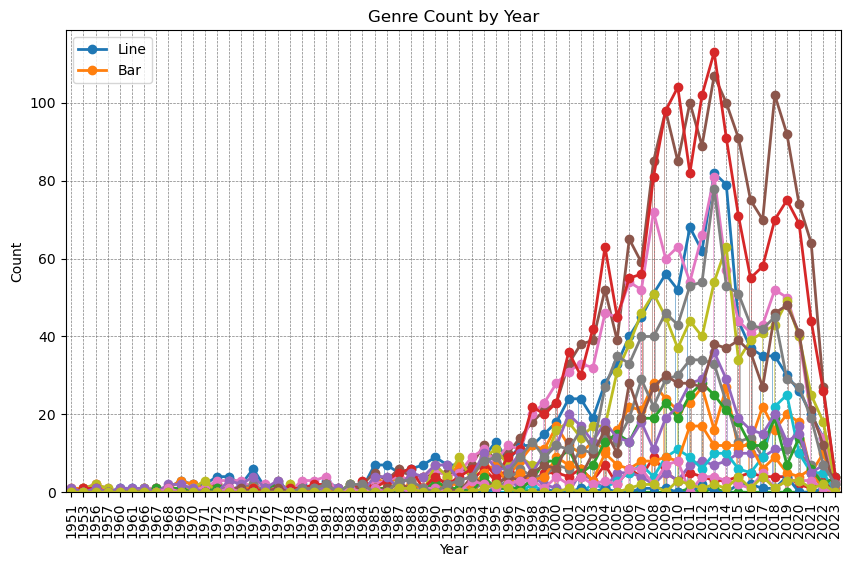

In [126]:
# LINE GRAPH - NOT INTERACTIVE

df_ex_combined = df_ex_combined.reset_index()
df_ex_combined.set_index('index', inplace=True)

# Sizing the dataframe
fig, ax = plt.subplots(figsize=(10, 6))

# Line plot
df_ex_combined.plot(kind='line', ax=ax, marker='o', linewidth=2)

# Bar plot
df_ex_combined.plot(kind='bar', ax=ax, alpha=0.5, width=0.4)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Genre Count by Year')

# Customize legend
ax.legend(["Line", "Bar"], loc='upper left')

# Customize gridlines
ax.grid(color='gray', linestyle='--', linewidth=0.5)

plt.show()

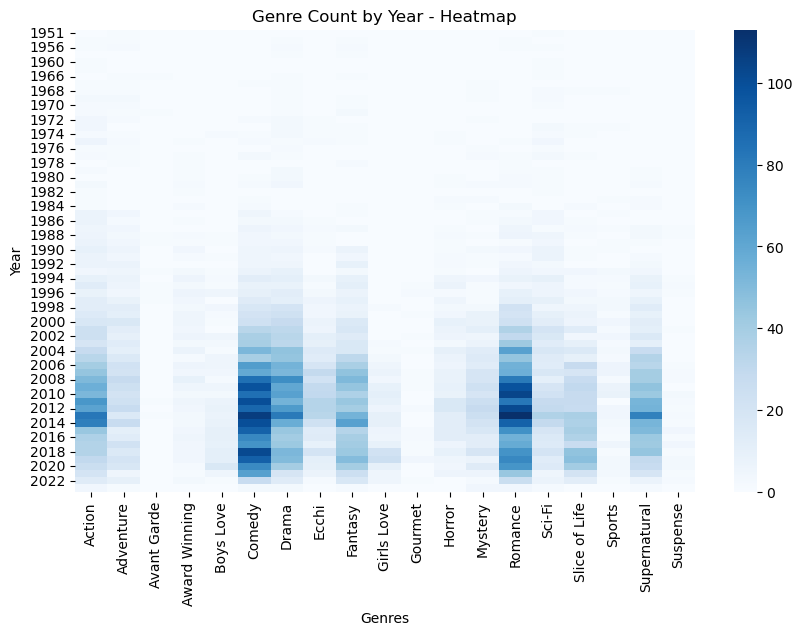

In [133]:
# HEATMAP2 - NOT INTERACTIVE

# Sizing the dataframe
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(df_ex_combined, cmap='Blues', ax=ax)

# Set the labels and title
plt.xlabel('Genres')
plt.ylabel('Year')
plt.title('Genre Count by Year - Heatmap')

plt.show()

In [234]:
# HEATMAP - INTERACTIVE
heatmap = go.Heatmap(
    x=df_ex_combined.columns,
    y=df_ex_combined.index,
    z=df_ex_combined.values,
    colorscale='Blues'
)

layout = go.Layout(
    xaxis=dict(title='Genres'),
    yaxis=dict(title='Year'),
    title='Genre Count by Year - Heatmap'
)

fig = go.Figure(data=[heatmap], layout=layout)

fig.show()

In [231]:
#LINE GRAPH - INTERACTIVE
df_plotly = df_ex_combined.reset_index()

line_plots = []
for feature in df_plotly.columns[1:]:
    line_plot = go.Scatter(
        x=df_plotly['index'],
        y=df_plotly[feature],
        mode='lines+markers',
        name=feature
    )
    line_plots.append(line_plot)


layout = go.Layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Count'),
    title='Genre Count by Year - Line Chart',
    showlegend=True
)


fig = go.Figure(data=line_plots, layout=layout)

# Show the interactive plot
fig.show()


In [238]:
df_ex_combined = df_ex_combined.reset_index()

In [232]:
# After clean data, we convert into json | csv
df_cor.to_csv('df_cor-manga.csv', index=False)
df_cor.to_json('df_cor-manga.json', orient='records')

df_cor2.to_csv('df_cor2-manga.csv', index=False)
df_cor2.to_json('df_cor2-manga.json', orient='records')

df_ex_combined.to_csv('df_ex_combined-manga.csv', index=False)
df_ex_combined.to_json('df_ex_combined-manga.json', orient='records')

In [363]:
# We are going to compute the correlation between SCORE | SCORE-GROUP and genres
# 1st thought, using HEAT MAP, LINE GRAPH
df_gen_sco = df.copy()

In [364]:
df_gen_sco.columns

Index(['name', 'type', 'status', 'time_published', 'genres', 'serialization',
       'score', 'ranked', 'popularity', 'members', 'favorites'],
      dtype='object')

In [365]:
df_gen_sco.drop(columns = ['name', 'type', 'status', 'time_published', 'serialization'
                           , 'ranked', 'popularity', 'members', 'favorites'],axis=1, inplace = True)

In [366]:
# normalize the genres column
genres = pd.get_dummies(df_gen_sco['genres'].apply(pd.Series).stack()).sum(level=0)
df_gen_sco = pd.concat([df_gen_sco, genres], axis=1)


# "score" column
df_gen_sco.score = df_gen_sco.score.apply(lambda x: x[0])
df_gen_sco.score = df_gen_sco.score.astype('float')

/var/folders/49/0z2npmwj0rlf4ldy37x66bb00000gn/T/ipykernel_24748/1323027559.py:2: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/var/folders/49/0z2npmwj0rlf4ldy37x66bb00000gn/T/ipykernel_24748/1323027559.py:2: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().



In [367]:
# Drop na in this dataframe and add if scores are equal
df_gen_sco = df_gen_sco.dropna()
df_gen_sco = df_gen_sco.drop(['genres'],axis = 1)
df_gen_sco = df_gen_sco.groupby('score').sum()

In [348]:
# HEATMAP - INTERACTIVE - SCORE GENRES
heatmap = go.Heatmap(
    x=df_gen_sco.columns,
    y=df_gen_sco.index,
    z=df_gen_sco.values,
    colorscale='Blues'
)

layout = go.Layout(
    xaxis=dict(title='Genres'),
    yaxis=dict(title='score'),
    title='Genre Count by Score - Heatmap'
)

fig = go.Figure(data=[heatmap], layout=layout)

fig.show()

In [369]:
# Scores grouped by 6-6.99 , 7-7.99, 8-8.99, 9-10
bins = [0, 6.99, 7.99, 8.99, 10]
df_gen_sco_final = df_gen_sco.reset_index()
sco_group = pd.cut(df_gen_sco_final.score, bins=bins, labels=['6-6.99','7-7.99','8-8.99','9-10'])
df_gen_sco_final.insert(1,'score-group', sco_group)

In [373]:
df_gen_sco_final = df_gen_sco_final.groupby('score-group').sum().drop(['score'],axis=1)

In [374]:
# HEATMAP - INTERACTIVE - SCORE-GROUPS GENRES
#df_gen_sco_final = df_gen_sco_final.reset_index()
heatmap = go.Heatmap(
    x=df_gen_sco_final.columns,
    y=df_gen_sco_final.index,
    z=df_gen_sco_final.values,
    colorscale='Blues'
)

layout = go.Layout(
    xaxis=dict(title='Genres'),
    yaxis=dict(title='score'),
    title='Genre Count by SCORE-GROUPS - Heatmap'
)

fig = go.Figure(data=[heatmap], layout=layout)

fig.show()

In [378]:
#LINE GRAPH - INTERACTIVE - SCORE-GROUPS VS GENRES
#df_plotly1 = df_gen_sco_final.reset_index()

line_plots = []
for feature in df_plotly1.columns[1:]:
    line_plot = go.Scatter(
        x=df_plotly1['score-group'],
        y=df_plotly1[feature],
        mode='lines+markers',
        name=feature
    )
    line_plots.append(line_plot)


layout = go.Layout(
    xaxis=dict(title='count'),
    yaxis=dict(title='score-group'),
    title='Genre Count by score-group - Line Chart',
    showlegend=True
)


fig = go.Figure(data=line_plots, layout=layout)

# Show the interactive plot
fig.show()
